# Diabetes Prediction Using Deep Learning

This notebook explores the development of a deep learning model aimed at predicting diabetes from health indicators. Utilizing the Diabetes Prediction Dataset, our goal is to create an accurate prediction tool that can serve as the foundation for a healthcare-focused tech startup. 

### About Dataset 
- Gender : refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

- Age : is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

- Hypertension : is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0.

- Heart disease is another medical condition that is associated with an increased risk of developing diabetes. 

- Smoking history : is also considered a risk factor for diabetes and can exacerbate the complications associated.

- BMI (Body Mass Index) : is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.

- HbA1c (Hemoglobin A1c) level : is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels. 

- Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key.

- Diabetes : is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the.

## Business Model Proposal

### Problem Statement
Diabetes affects millions worldwide, presenting a significant health challenge. Early detection and management can drastically improve outcomes, yet many remain undiagnosed until complications arise. Our solution aims to leverage deep learning to predict diabetes risk more effectively, enabling early intervention.

### Target Customers
Our primary customers are healthcare providers seeking to enhance diagnostic capabilities and individuals seeking to assess their diabetes risk proactively.

### Value Proposition
We offer an AI-powered tool that improves diabetes risk prediction, supports healthcare decision-making, and empowers individuals with actionable health insights, thereby contributing to better health outcomes and reduced healthcare costs.



#### Importing necessary libraries 

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



#### Loading the Dataset

In [88]:
# Loading the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')



In [89]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Exploratory Data Analysis 



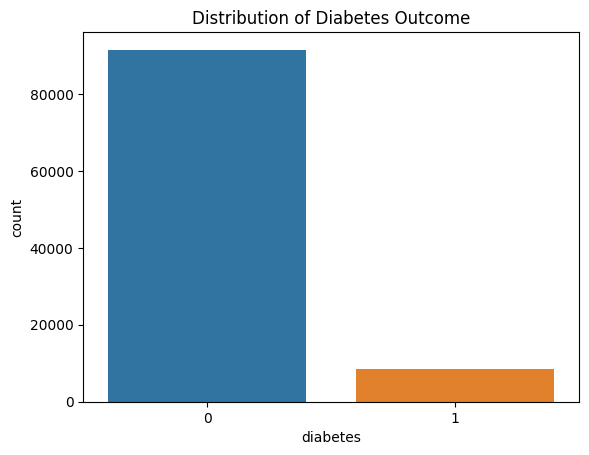

In [90]:
# Plotting the distribution of the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.savefig('distribution_diabetes.png')
plt.show()


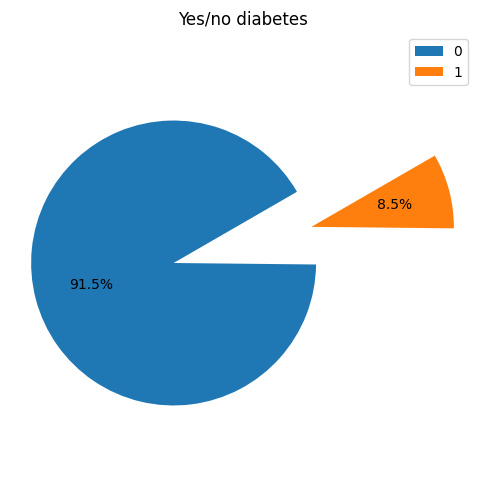

In [116]:
def balanced_plot(df):

    plt.figure(figsize=(6, 6))
    plt.pie(df.diabetes.value_counts(), 
            df.diabetes.value_counts().index, 
            autopct='%1.1f%%', 
            startangle=30)
    plt.axis('equal')
    plt.legend(df.diabetes.value_counts().index, loc='best')
    plt.title('Yes/no diabetes')
    plt.show()
    
balanced_plot(df)

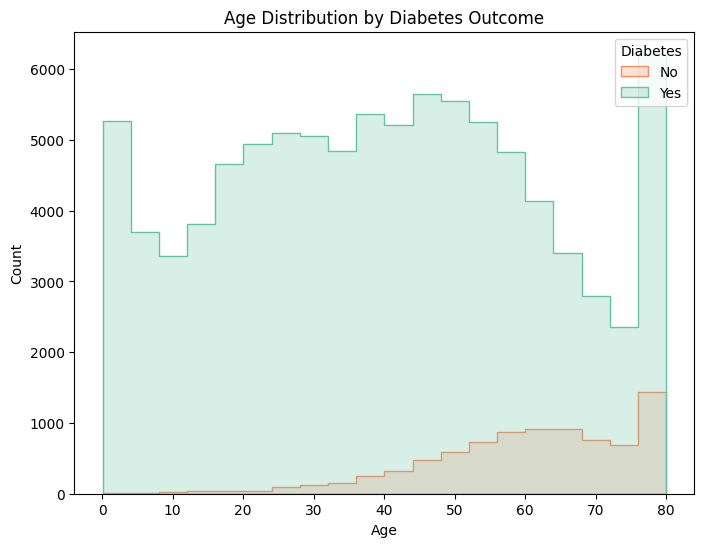

In [91]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='diabetes', element='step', palette='Set2', bins=20)
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

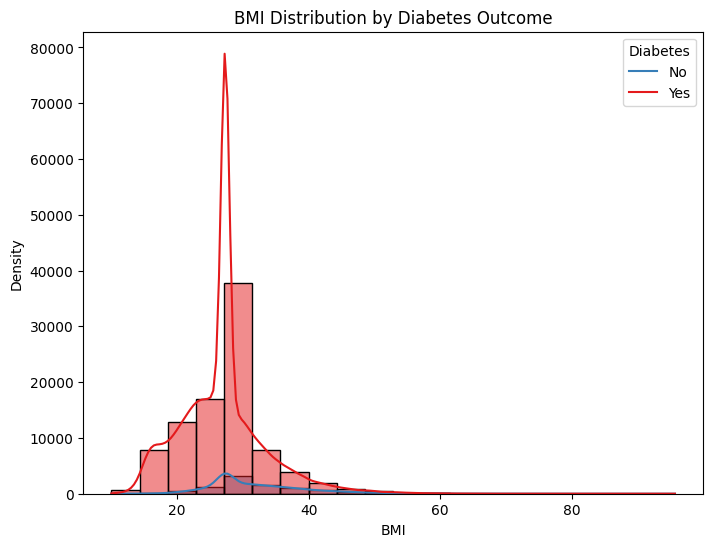

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='bmi', hue='diabetes', kde=True, palette='Set1', bins=20)
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.savefig('bmi.png')
plt.show()

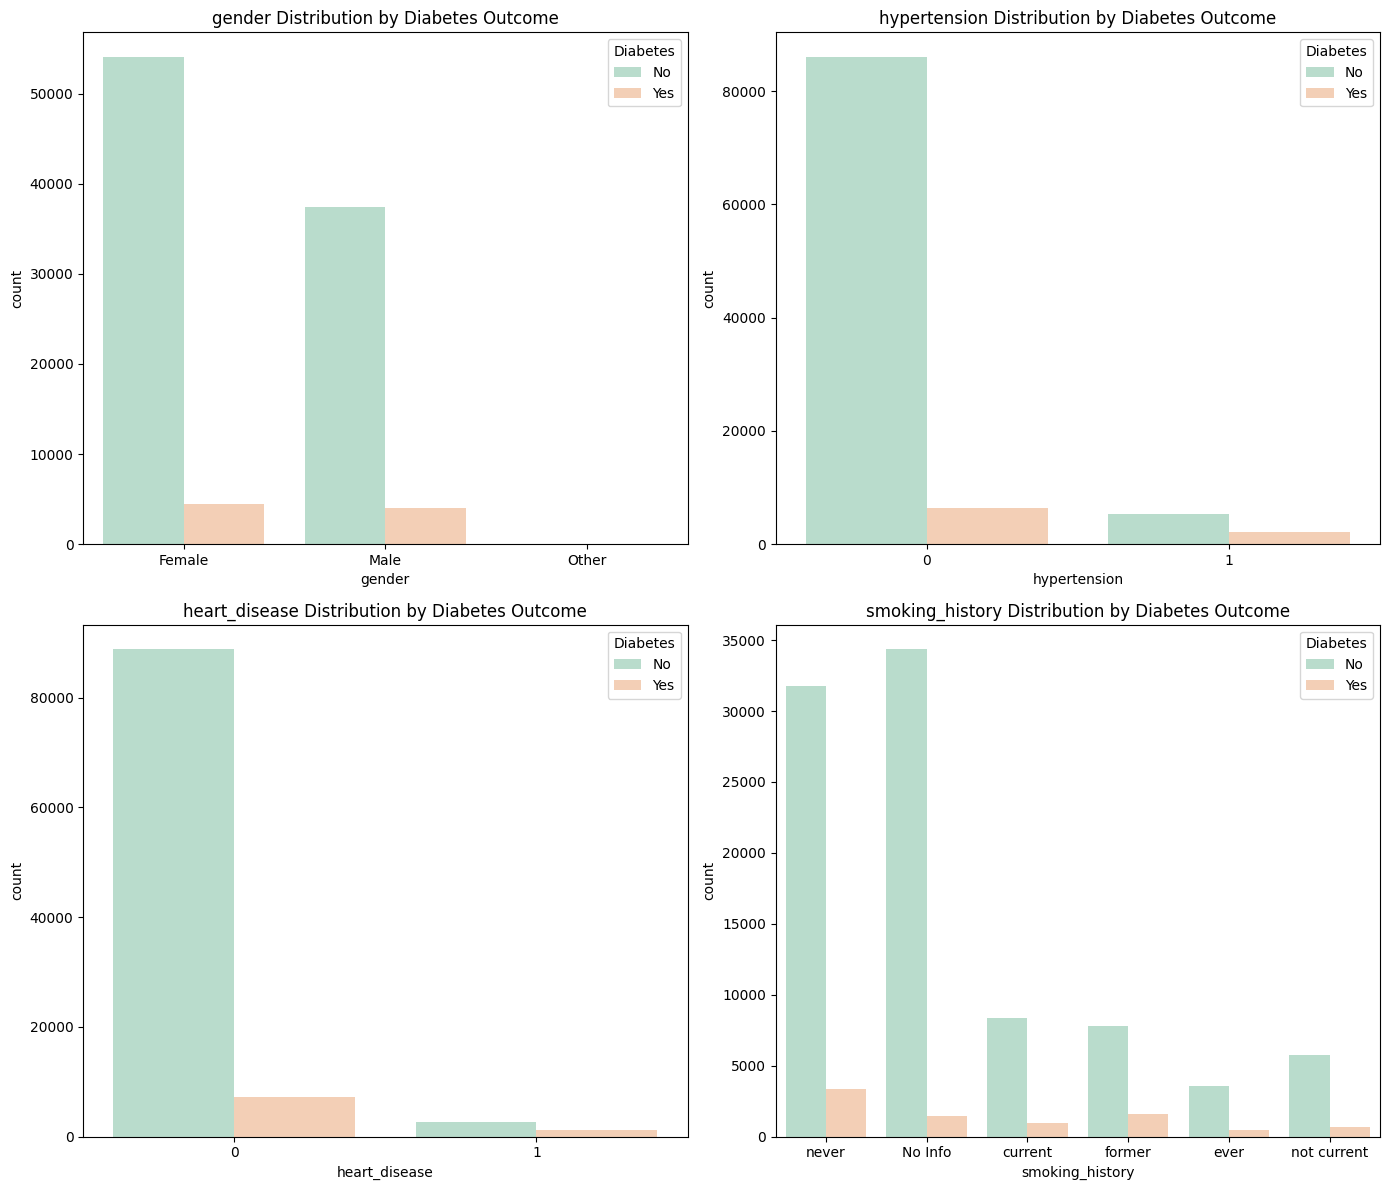

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for feature, ax in zip(categorical_features, axs.flatten()):
    sns.countplot(x=feature, hue='diabetes', data=df, palette='Pastel2', ax=ax)
    ax.set_title(f'{feature} Distribution by Diabetes Outcome')
    ax.legend(title='Diabetes', labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('subplots.png')
plt.show()

## Dataset Overview and Preprocessing

The Diabetes Prediction Dataset comprises various health indicators, including glucose levels, blood pressure, and BMI, among others. Our preprocessing steps included:

- **Data Cleaning**: Addressing missing values and outliers to improve data quality.
- **Feature Engineering**: Creating new features that could enhance model performance.
- **Data Normalization**: Scaling feature values to ensure model accuracy and efficiency.
- **Train-Test Split**: Dividing the dataset into training, validation, and test sets to enable model evaluation.


In [94]:
# Defining categorical and numeric features
categorical_features = ['gender', 'smoking_history']
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
binary_features = ['hypertension', 'heart_disease']
# Defining column names
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
binary_features = ['hypertension', 'heart_disease']
categorical_features = ['gender', 'smoking_history']  

# Creating a pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [95]:
#Dividing the dataset into training, validation, and test sets to enable model evaluation.
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Logistic Regression Model
As a baseline, a logistic regression model was implemented. This section details the model's setup, training process, and evaluation results, providing a benchmark for the subsequent deep learning model.


In [96]:
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Fitting the model
lr_model.fit(X_train, y_train)

# Evaluating performance on validation set
y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



Validation Set Performance:
Accuracy: 0.9590666666666666
Precision: 0.8552631578947368
Recall: 0.618066561014263
F1-score: 0.7175712971481141


In [97]:
# Evaluating performance on test set
y_test_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Test Set Performance:
Accuracy: 0.9592666666666667
Precision: 0.8695175438596491
Recall: 0.6171206225680934
F1-score: 0.7218934911242604


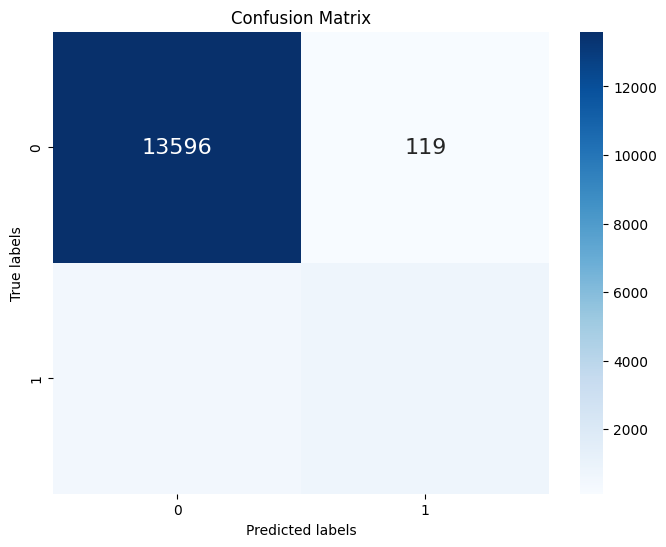

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
# Calculating TP, TN, FP, FN from the confusion matrix
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 793
True Negatives (TN): 13596
False Positives (FP): 119
False Negatives (FN): 492


In [100]:
# Calculate percentages
total_samples = TN + FP + FN + TP
TPR = (TP / (TP + FN)) * 100
TNR = (TN / (TN + FP)) * 100
FPR = (FP / (FP + TN)) * 100
FNR = (FN / (FN + TP)) * 100

print(f"True Positive Rate (TPR): {TPR:.2f}%")
print(f"True Negative Rate (TNR): {TNR:.2f}%")
print(f"False Positive Rate (FPR): {FPR:.2f}%")
print(f"False Negative Rate (FNR): {FNR:.2f}%")


True Positive Rate (TPR): 61.71%
True Negative Rate (TNR): 99.13%
False Positive Rate (FPR): 0.87%
False Negative Rate (FNR): 38.29%


### Deep Learning Model
Our deep learning model employs several layers, including dense layers with ReLU activation and a final sigmoid layer for binary classification. The model architecture, training details, and optimization strategies are discussed.

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [102]:
# Defining categorical and numeric features
categorical_features = ['gender', 'smoking_history']
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Creating the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Standardize numeric features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Encode categorical features

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [103]:
# Applying preprocessing to the features (excluding the target variable 'diabetes')
X_preprocessed = preprocessor.fit_transform(df.drop('diabetes', axis=1))
y = df['diabetes']

In [104]:
# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#### DL Model 4 :Preliminary model with Early Stopping 

##### After making additions to and tuning the initial DL model, we now define the model with an additional Dense layer, EarlyStopping Callback and using L2 regularization, combined with a custom learning rate for the Adam optimizer

In [105]:
from tensorflow.keras.optimizers import Adam

# Defining the EarlyStopping callback
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Defining the model with an additional Dense layer and using L2 regularization
model_complex = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # Additional Dense layer
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)), 
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiling the model with a custom learning rate for the Adam optimizer
model_complex.compile(optimizer=Adam(learning_rate=0.0001),  # Specify custom learning rate here
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Training the model with Early Stopping
history_complex = model_complex.fit(X_train, y_train,
                                    epochs=50,
                                    batch_size=32,
                                    validation_data=(X_validate, y_validate),
                                    callbacks=[early_stopping_monitor])

# Evaluating the model on the test set
test_loss, test_accuracy = model_complex.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
2188/2188 [==============================] - 19s 7ms/step - loss: 0.9088 - accuracy: 0.7455 - val_loss: 0.5752 - val_accuracy: 0.9544
Epoch 2/50
2188/2188 [==============================] - 14s 7ms/step - loss: 0.6025 - accuracy: 0.9219 - val_loss: 0.4543 - val_accuracy: 0.9616
Epoch 3/50
2188/2188 [==============================] - 14s 7ms/step - loss: 0.4896 - accuracy: 0.9384 - val_loss: 0.3953 - val_accuracy: 0.9605
Epoch 4/50
2188/2188 [==============================] - 13s 6ms/step - loss: 0.4263 - accuracy: 0.9424 - val_loss: 0.3489 - val_accuracy: 0.9597
Epoch 5/50
2188/2188 [==============================] - 12s 5ms/step - loss: 0.3722 - accuracy: 0.9449 - val_loss: 0.3055 - val_accuracy: 0.9611
Epoch 6/50
2188/2188 [==============================] - 12s 5ms/step - loss: 0.3318 - accuracy: 0.9461 - val_loss: 0.2720 - val_accuracy: 0.9611
Epoch 7/50
2188/2188 [==============================] - 11s 5ms/step - loss: 0.2918 - accuracy: 0.9498 - val_loss: 0.2429 - val_ac

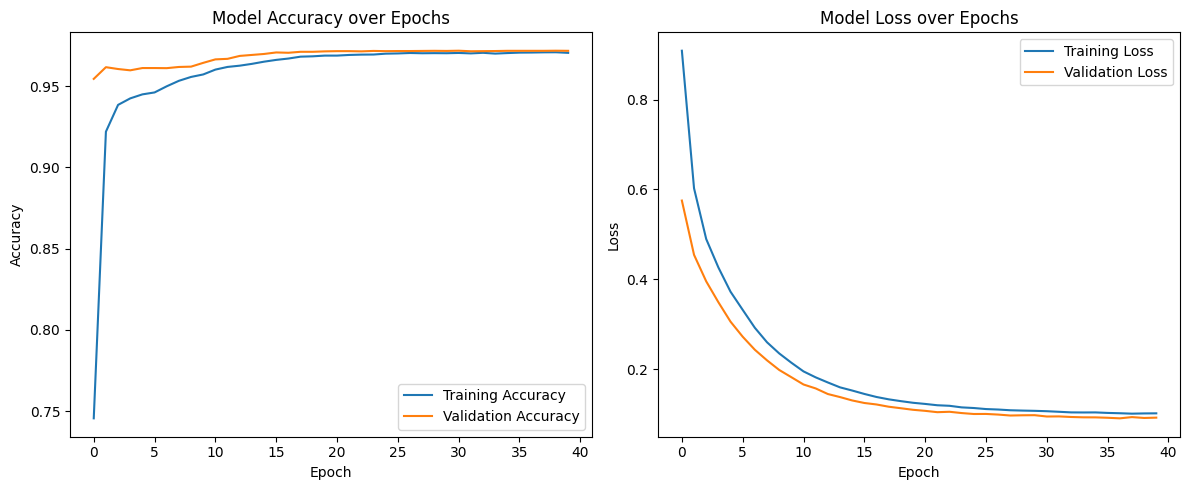

In [106]:
# Training and validation Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_complex.history['accuracy'], label='Training Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Training and Validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history_complex.history['loss'], label='Training Loss')
plt.plot(history_complex.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

469/469 [==============================] - 2s 3ms/step
[[13715     0]
 [  430   855]]


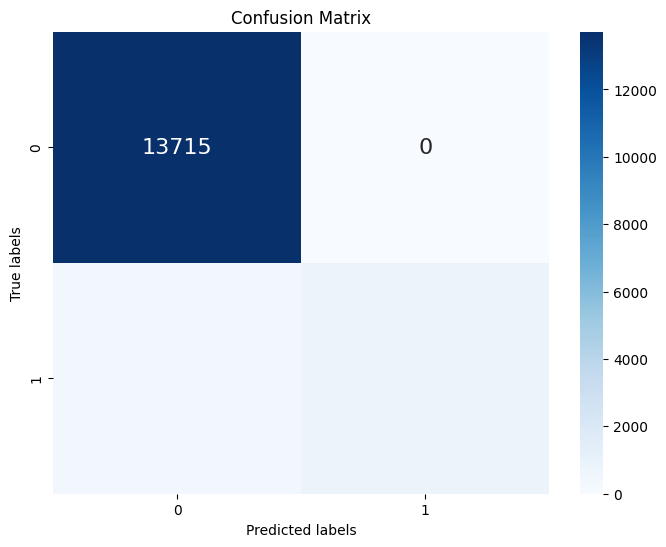

In [107]:
# Predicting probabilities for the test set
y_probs = model_complex.predict(X_test)

# Converting probabilities to class predictions
# Using 0.5 as the threshold for classification
y_pred = (y_probs > 0.5).astype("int32")

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [108]:
TN, FP, FN, TP = cm.ravel()

# Calculating the rates
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)

print(f"True Positive Rate (Sensitivity): {TPR:.2f}")
print(f"False Positive Rate: {FPR:.2f}")
print(f"False Negative Rate: {FNR:.2f}")
print(f"True Negative Rate (Specificity): {TNR:.2f}")


True Positive Rate (Sensitivity): 0.67
False Positive Rate: 0.00
False Negative Rate: 0.33
True Negative Rate (Specificity): 1.00


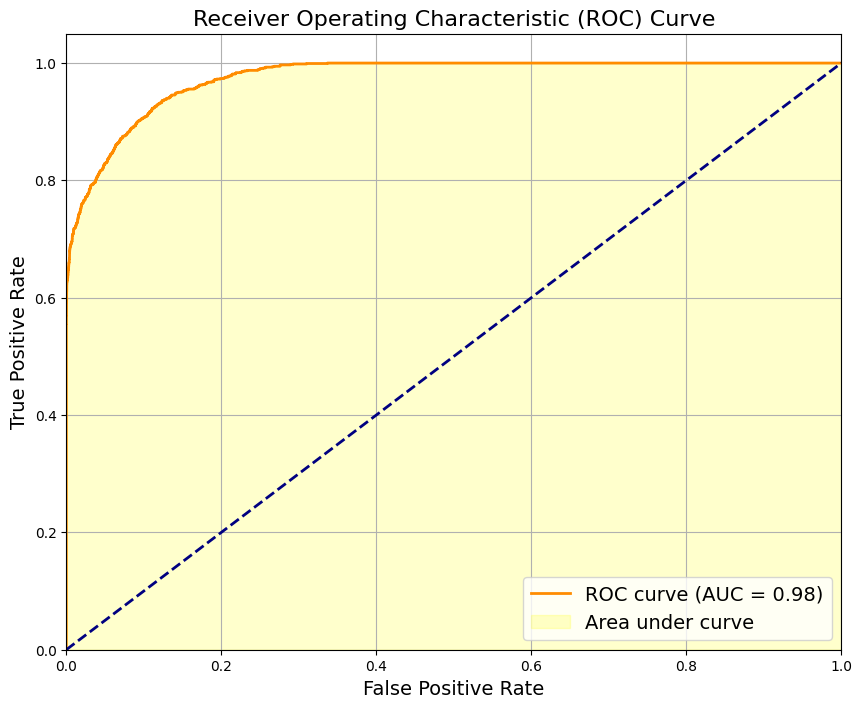

In [109]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='yellow', label='Area under curve')  # Fill color
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.show()



#### Performance Evaluation
The model achieved an impressive accuracy on the test set. We also examined other metrics such as precision, recall, and the AUC-ROC curve to fully assess its performance. Key findings and visualizations from the training process, including accuracy over epochs and the confusion matrix, are presented.

## Addressing Data Imbalance through Oversampling
The initial accuracy metric of 97.11% may seem impressive at first glance. However, this high percentage could be misleading due to the imbalanced nature of our dataset. In the context of our project, which focuses on the binary classification of diabetes, such an imbalance poses a significant risk: our model may learn to predict the majority class well but perform poorly on the minority class — which, in medical diagnostics, could lead to life-threatening misdiagnoses.

To ensure our model learns to identify both classes effectively, simply relying on accuracy as a performance measure is insufficient. This is because traditional accuracy does not distinguish between the types of errors made, which in our case, can have very different consequences.

Thus, to mitigate this risk and strive for a more reliable and equitable performance across both classes (diabetic and non-diabetic), we employ resampling techniques. Specifically, we choose to use Oversampling of the minority class (presence of diabetes) to balance our dataset. Oversampling increases the examples of the minority class in the training data, giving the model more opportunities to learn the characteristics of these critical but underrepresented cases. This balanced approach aims to improve the model's predictive power for all patient outcomes, not just the majority.

## Balancing Classes with Dual-Sampling

In predictive modeling, class imbalance can significantly skew results. To counteract this, we've implemented dual-sampling, which synergistically combines oversampling the minority class with undersampling the majority class. This strategy strikes a balance, enhancing model performance by reinforcing the minority class signal and pruning redundant majority class information. Dual-sampling preserves valuable data and ensures both classes contribute equally to model training, fostering a fair, unbiased, and accurate model that is reflective of the real-world scenario it's designed to interpret.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df1 = pd.read_csv('diabetes_prediction_dataset.csv')

# Define categorical and numeric features
categorical_features = ['gender', 'smoking_history']
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Standardize numeric features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Encode categorical features

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Modify the pipeline to include both SMOTE and RandomUnderSampler
resampling_strategy = make_pipeline_imb(preprocessor,
                                        SMOTE(sampling_strategy=0.1, random_state=42),  # Oversample the minority class
                                        RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Then undersample the majority class
                                       )

X = df1.drop('diabetes', axis=1)
y = df1['diabetes']

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply preprocessing and resampling to the training data
X_train_resampled, y_train_resampled = resampling_strategy.fit_resample(X_train, y_train)

# Apply preprocessing to validation and test data (without fitting or resampling)
X_validate_preprocessed = preprocessor.transform(X_validate)
X_test_preprocessed = preprocessor.transform(X_test)

In [120]:
original_class_distribution = np.bincount(y_train)
resampled_class_distribution = np.bincount(y_train_resampled)

print("Original class distribution:", original_class_distribution)
print("Resampled class distribution:", resampled_class_distribution)

Original class distribution: [64047  5953]
Resampled class distribution: [12808  6404]


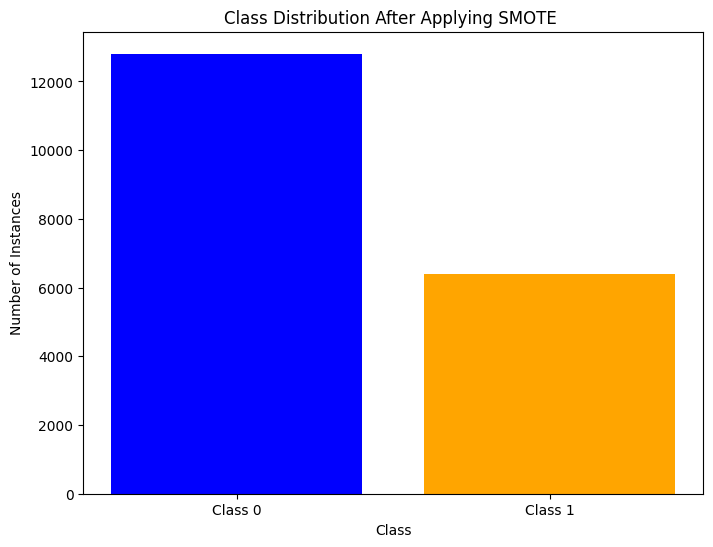

In [124]:
# Assuming y_train_resampled contains your balanced class labels after applying SMOTE
class_distribution_resampled = y_train_resampled.value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_distribution_resampled.index.astype(str), class_distribution_resampled.values, color=['blue', 'orange'])
plt.title('Class Distribution After Applying SMOTE ')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(class_distribution_resampled.index.astype(str), ['Class 0', 'Class 1'])

# Show the plot
plt.show()

#### Logit with Balanced Data

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logit_model = LogisticRegression(max_iter=1000)

# Fit the model on the balanced and preprocessed training data
logit_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = logit_model.predict(X_test_preprocessed)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9231
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     13715
           1       0.53      0.80      0.64      1285

    accuracy                           0.92     15000
   macro avg       0.76      0.87      0.80     15000
weighted avg       0.94      0.92      0.93     15000



### DL Model with Balanced Data

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with Dropout
model_with_dropout = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')
])

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.0001),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,        # Stop after 10 epochs without improvement
                               verbose=1,
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored metric

# Train the model with EarlyStopping
history_with_dropout = model_with_dropout.fit(X_train_resampled, y_train_resampled,
                                              epochs=50,
                                              batch_size=32,
                                              validation_data=(X_validate_preprocessed, y_validate),
                                              verbose=2,
                                              callbacks=[early_stopping])  # Include the EarlyStopping callback

# Evaluate the model's performance
test_loss_dropout, test_accuracy_dropout = model_with_dropout.evaluate(X_test_preprocessed, y_test, verbose=0)

print(f'Test Loss with Dropout and Early Stopping: {test_loss_dropout:.4f}')
print(f'Test Accuracy with Dropout and Early Stopping: {test_accuracy_dropout:.4f}')



Epoch 1/50
601/601 - 7s - loss: 0.4150 - accuracy: 0.8036 - val_loss: 0.2374 - val_accuracy: 0.9058 - 7s/epoch - 12ms/step
Epoch 2/50
601/601 - 4s - loss: 0.3082 - accuracy: 0.8677 - val_loss: 0.1973 - val_accuracy: 0.9254 - 4s/epoch - 7ms/step
Epoch 3/50
601/601 - 3s - loss: 0.2809 - accuracy: 0.8790 - val_loss: 0.1781 - val_accuracy: 0.9345 - 3s/epoch - 6ms/step
Epoch 4/50
601/601 - 4s - loss: 0.2740 - accuracy: 0.8803 - val_loss: 0.1750 - val_accuracy: 0.9347 - 4s/epoch - 6ms/step
Epoch 5/50
601/601 - 3s - loss: 0.2599 - accuracy: 0.8809 - val_loss: 0.1778 - val_accuracy: 0.9285 - 3s/epoch - 6ms/step
Epoch 6/50
601/601 - 3s - loss: 0.2548 - accuracy: 0.8836 - val_loss: 0.1694 - val_accuracy: 0.9304 - 3s/epoch - 6ms/step
Epoch 7/50
601/601 - 3s - loss: 0.2498 - accuracy: 0.8860 - val_loss: 0.1723 - val_accuracy: 0.9252 - 3s/epoch - 6ms/step
Epoch 8/50
601/601 - 4s - loss: 0.2481 - accuracy: 0.8865 - val_loss: 0.1709 - val_accuracy: 0.9243 - 4s/epoch - 6ms/step
Epoch 9/50
601/601 - 3s

In [119]:
# Save the model to a .keras file
model_with_dropout.save('model_with_dropout.keras')

# Print a confirmation message
print('Model saved as model_with_dropout.keras')


Model saved as model_with_dropout.keras


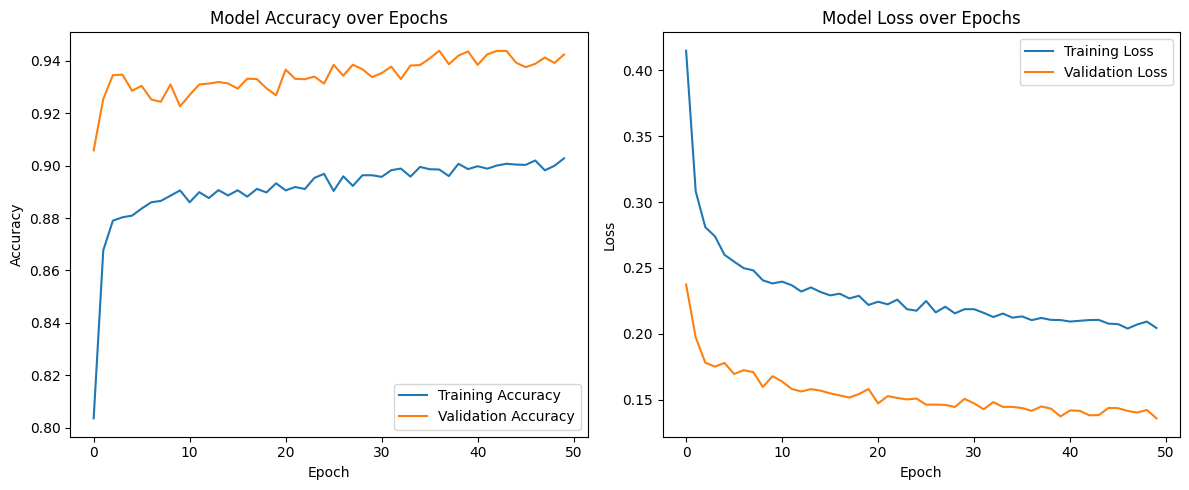

In [113]:
# Training and validation Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Training and Validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [122]:
# Predict the probabilities for the test data
y_pred_probs = model_with_dropout.predict(X_test_preprocessed)

# Convert probabilities to class predictions, assuming a threshold of 0.5
y_pred = (y_pred_probs > 0.5).astype('int32')

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# True positives, false positives, true negatives, false negatives
TP = conf_mat[1, 1]
FP = conf_mat[0, 1]
TN = conf_mat[0, 0]
FN = conf_mat[1, 0]

# Calculate rates
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate (Specificity)
FNR = FN / (FN + TP)  # False Negative Rate

# Output the confusion matrix and rates
print("Confusion Matrix:")
print(conf_mat)
print("-----------------------------------")

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print("-----------------------------------")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")


469/469 [==============================] - 1s 3ms/step
Confusion Matrix:
[[13091   624]
 [  228  1057]]
-----------------------------------
True Positives (TP): 1057
False Positives (FP): 624
True Negatives (TN): 13091
False Negatives (FN): 228
-----------------------------------
True Positive Rate (TPR): 0.8226
False Positive Rate (FPR): 0.0455
True Negative Rate (TNR): 0.9545
False Negative Rate (FNR): 0.1774


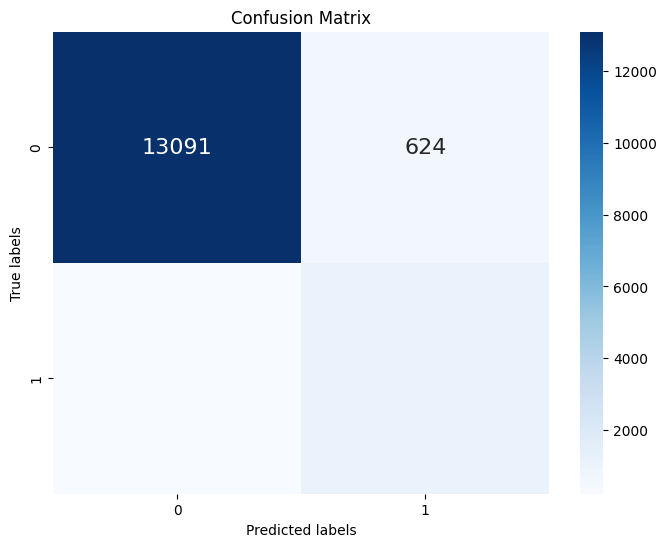

In [123]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

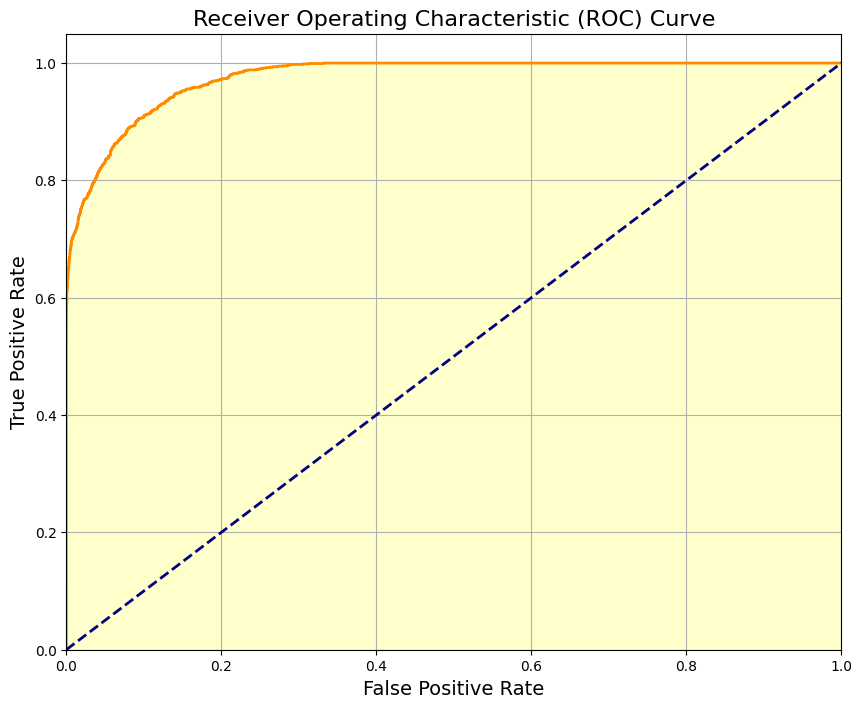

In [118]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='yellow', label='Area under curve')  # Fill color
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.grid(True)
plt.show()



### Further Improvements and Data Needs

To enhance our model, additional data covering a broader demographic and more diverse health indicators could be invaluable. Future improvements may also involve exploring more complex neural network architectures and incorporating real-world patient feedback to refine our predictions. The potential challenges and costs associated with acquiring and integrating new data sources are also considered.

### Conclusion

This project demonstrates the potential of deep learning in predicting diabetes, offering a foundation for a business model that addresses a critical healthcare need. Our model shows promising results, and with further refinement and data, it has the potential to significantly impact diabetes diagnosis and management. 
